In [42]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import LSTM

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn import metrics


from keras.callbacks import ModelCheckpoint
from keras.layers import CuDNNLSTM
from tensorflow.keras import activations

import tensorflow as tf
import plotly.express as px
import seaborn as sns

In [53]:
series=pd.read_csv('supplemental_train.csv')
info=pd.read_csv('asset_details.csv')

In [5]:
series.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,-0.004525
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0.003096
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0.001426
5,1623542400,5,359.0,4.832550,4.84590,4.82290,4.837583,47143.548386,4.836607,-0.000579
6,1623542400,7,541.0,55.223080,55.49400,55.18200,55.344680,6625.201803,55.298816,-0.003998
7,1623542400,6,2186.0,2371.194286,2379.20000,2369.67000,2374.380714,1214.128692,2374.335307,0.002565
8,1623542400,8,35.0,1.003150,1.01980,0.98730,1.003300,7061.927600,1.002936,-0.005097
9,1623542400,9,560.0,161.933429,162.48000,161.73000,162.214714,1485.009496,162.231310,0.000686


In [47]:
series_bitcoin = series[series['Asset_ID']==1]
series_bitcoin = series_bitcoin.set_index("timestamp")
df_train = pd.merge(series, info, how="left", on=["Asset_ID"])

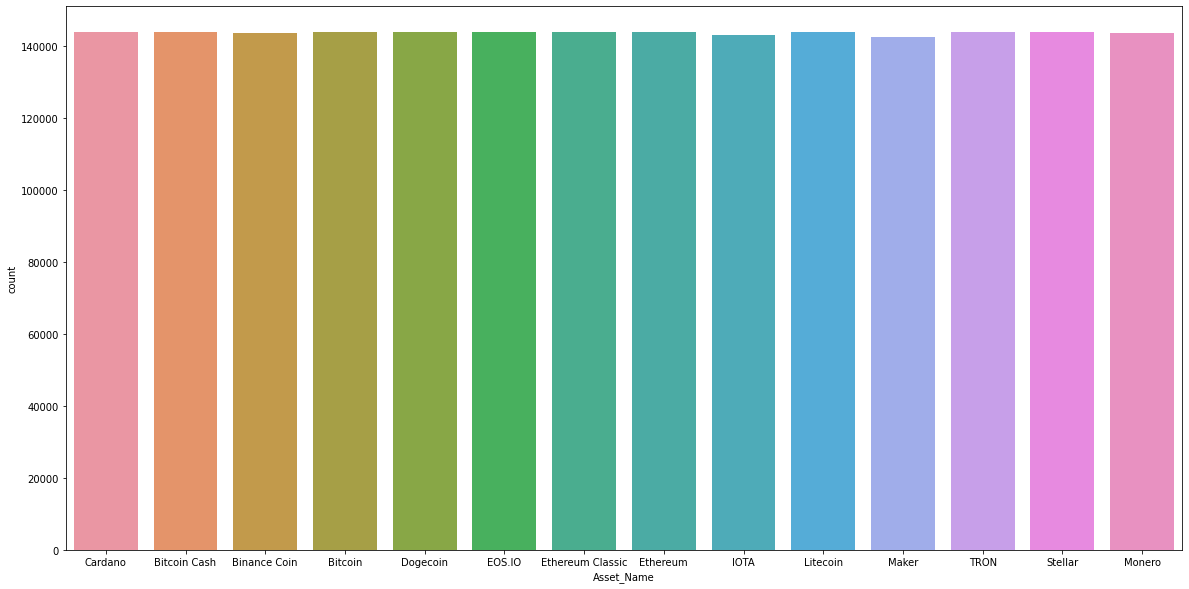

In [63]:

info_s=info.sort_values("Weight")
fig_index=px.bar(info_s,x="Asset_Name" , y="Weight", color="Weight", title="distribucion de pesos de las crptomonedas ")
fig_index.show()
df = df_train.dropna()
plt.subplots(figsize=(20,10))
sns.countplot(x='Asset_Name', data = df)

In [7]:
#Comparamos el comportamiento general de tres criptomonedas y vemos que en general su compostamiento es bastante similar. 
import plotly.graph_objects as go

btc_mini = series_bitcoin.iloc[-200:] 
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=series[series['Asset_ID']==1].iloc[-200:]['Open'], high=series[series['Asset_ID']==1].iloc[-200:]['High'], low=series[series['Asset_ID']==1].iloc[-200:]['Low'], close=series[series['Asset_ID']==1].iloc[-200:]['Close'])])
fig.update_layout(
    title={'text': 'Bitcoin','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()
 
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=series[series['Asset_ID']==6].iloc[-200:]['Open'], high=series[series['Asset_ID']==6].iloc[-200:]['High'], low=series[series['Asset_ID']==6].iloc[-200:]['Low'], close=series[series['Asset_ID']==6].iloc[-200:]['Close'])])
fig.update_layout(
    title={'text': 'Etereum','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=series[series['Asset_ID']==4].iloc[-200:]['Open'], high=series[series['Asset_ID']==4].iloc[-200:]['High'], low=series[series['Asset_ID']==4].iloc[-200:]['Low'], close=series[series['Asset_ID']==4].iloc[-200:]['Close'])])
fig.update_layout(
    title={'text': 'Dogecoin','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

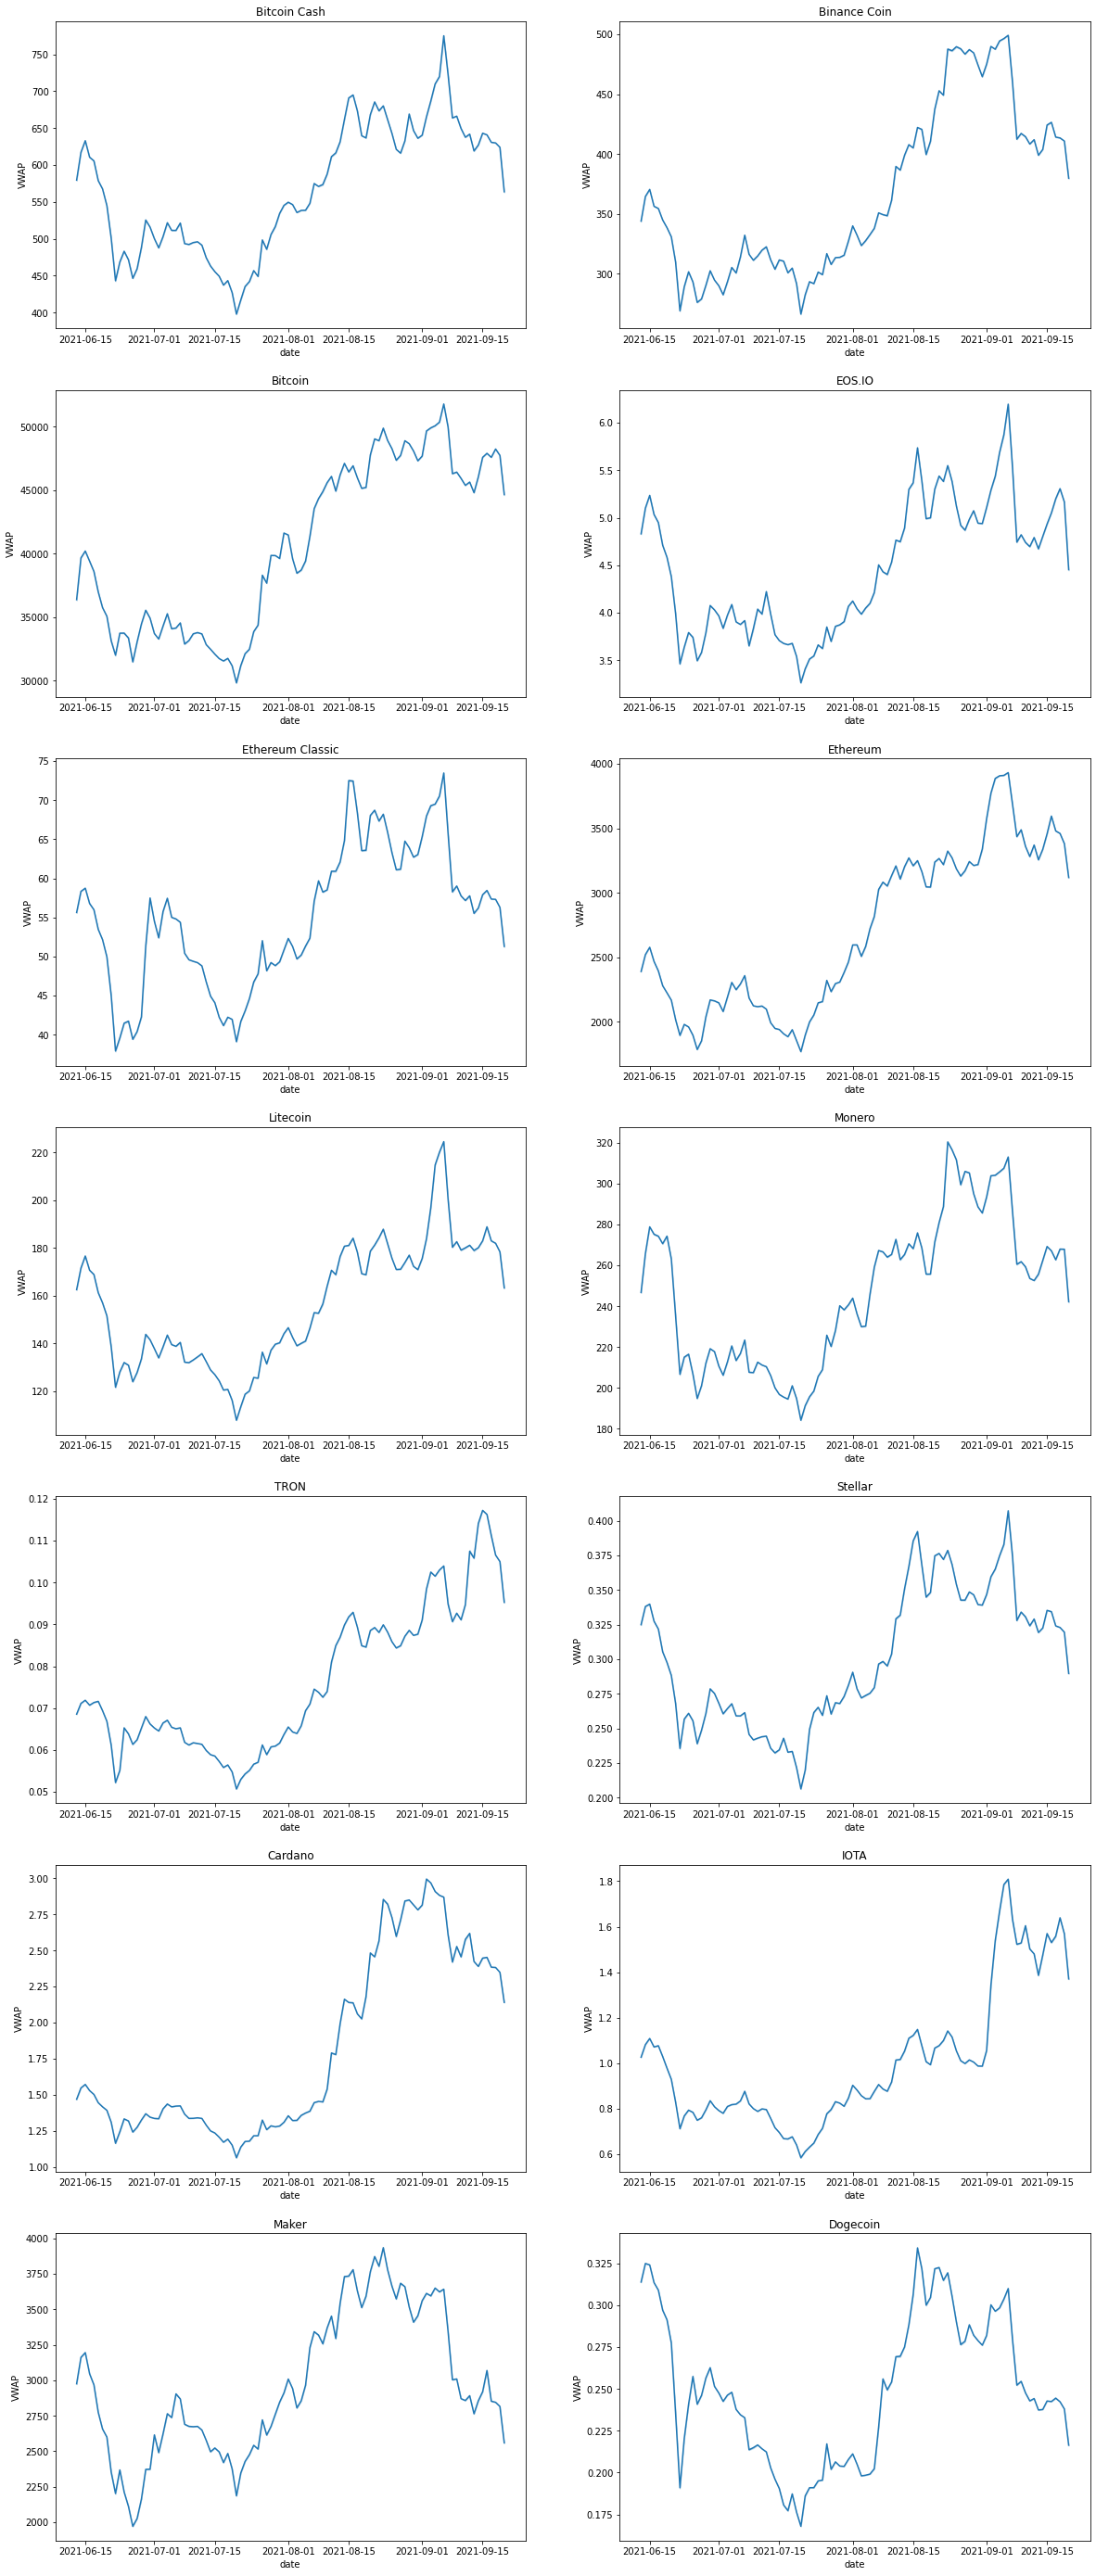

In [62]:

fig, axes = plt.subplots(7, 2, figsize=(20, 50))
df['fulldate'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['fulldate'].apply(lambda d: d.date())
df['time'] = df['fulldate'].apply(lambda d: d.time())
for i,asset in enumerate(info['Asset_Name']):
    df_crypt = df[df['Asset_Name'] == asset]
    sns.lineplot(x="date", y="VWAP", data=df_crypt, ax=axes[int(i/2),i%2])
    axes[int(i/2),i%2].set_title(asset)

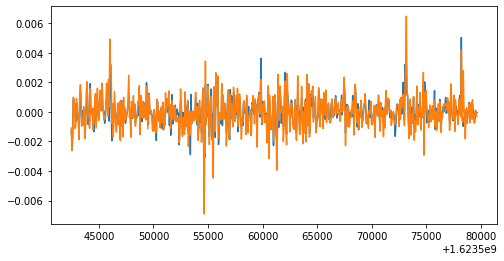

In [19]:

# se grafican los cambios normalizados para ver de forma vizual la correlacion entre bitcoin y ethereum
import scipy.stats as stats

lret_btc = log_return(btc_mini_2021.Close)[1:]
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

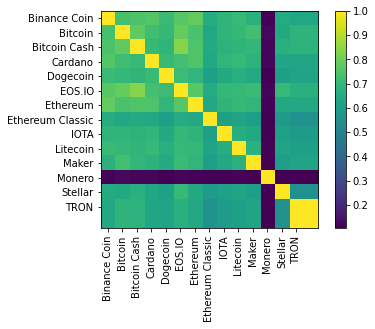

In [35]:
# Obtenemos la correlacion entre todas las criptomonedas.

logs=pd.DataFrame([])
for asset_id, asset_name in zip(info.Asset_ID, info.Asset_Name):
    asset=series[series["Asset_ID"]==asset_id].set_index("timestamp")
    asset=asset.loc[totimestamp("01/01/2021"):totimestamp("21/09/2021")]
    asset=asset.reindex(range(asset.index[0],asset.index[-1]+60,60), method="pad")
    lret=log_return(asset.Close.fillna(0))[1:]
    logs=all2021.join(lret,rsuffix=asset_name,how="outer")
    
plt.imshow(logs.corr());
plt.yticks(info.Asset_ID, info.Asset_Name.values)
plt.xticks(info.Asset_ID, info.Asset_Name.values,rotation="vertical");
plt.colorbar()